# Cleaning the data and training the model

### Getting started

In [1]:
# Importing the requried libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

### Reading data

In [2]:
# Reading the csv data as dataframes
df1=pd.read_csv(r'C:\Users\Mohan.S\Desktop\Mohan_Project\Project6\ResaleFlatDate19901999.csv')
df2=pd.read_csv(r'C:\Users\Mohan.S\Desktop\Mohan_Project\Project6\ResaleFlatDate2000Feb2012.csv')
df3=pd.read_csv(r'C:\Users\Mohan.S\Desktop\Mohan_Project\Project6\ResaleFlatFromMar2012toDec2014.csv')
df4=pd.read_csv(r'C:\Users\Mohan.S\Desktop\Mohan_Project\Project6\ResaleFlatFromJan2015toDec2016.csv')
df5=pd.read_csv(r'C:\Users\Mohan.S\Desktop\Mohan_Project\Project6\ResaleflatpricesfromJan2017onwards.csv')

In [3]:
# Shape of each dataframes
dfs=[df1,df2,df3,df4,df5]
for i in dfs:
    print(i.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(172346, 11)


In [4]:
# Concating all dataframes to a single dataframe
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

### Understanding the data and cleaning

In [5]:
# Displaying the data
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [6]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
918544,2024-02,YISHUN,5 ROOM,513D,YISHUN ST 51,04 TO 06,113.0,Improved,2018,708000.0,93 years 01 month
918545,2024-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 10 months
918546,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62 years 11 months
918547,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62 years 10 months
918548,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months


In [7]:
# Shape of the data
df.shape

(918549, 11)

In [8]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918549 entries, 0 to 918548
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                918549 non-null  object 
 1   town                 918549 non-null  object 
 2   flat_type            918549 non-null  object 
 3   block                918549 non-null  object 
 4   street_name          918549 non-null  object 
 5   storey_range         918549 non-null  object 
 6   floor_area_sqm       918549 non-null  float64
 7   flat_model           918549 non-null  object 
 8   lease_commence_date  918549 non-null  int64  
 9   resale_price         918549 non-null  float64
 10  remaining_lease      209499 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.1+ MB


In [9]:
# Unique values in each column
for col in df.columns[0:]:
    print(col, ': ', (df[col].nunique()), 'labels')

month :  410 labels
town :  27 labels
flat_type :  8 labels
block :  2705 labels
street_name :  584 labels
storey_range :  25 labels
floor_area_sqm :  211 labels
flat_model :  34 labels
lease_commence_date :  56 labels
resale_price :  9396 labels
remaining_lease :  721 labels


In [10]:
# Null values
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

Droping the 'remaining_lease' column as majority of the rows lacks this value(data is available only from 2015)

In [11]:
# Droping the column as mojority of the data is null
df = df.drop(columns='remaining_lease')

In [12]:
# After droping the column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

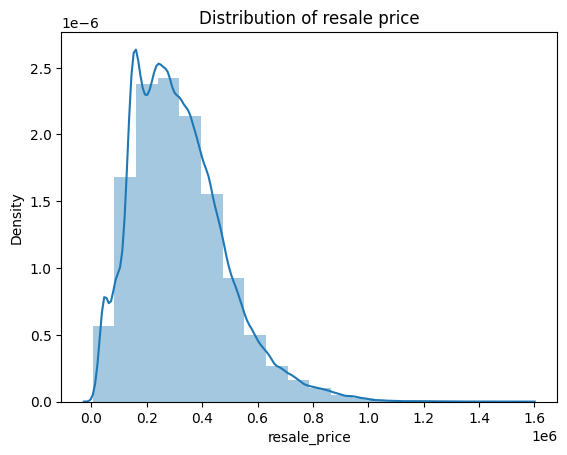

In [13]:
# Visualize the distribution of the resale price column
sns.distplot(df['resale_price'], bins = 20)
plt.title('Distribution of resale price')
plt.show()

### Dealing with Features

#### flat_type column
Collapsing flat type categories

In [14]:
df['flat_type'].value_counts()

4 ROOM              348705
3 ROOM              293834
5 ROOM              193456
EXECUTIVE            69126
2 ROOM               11588
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       261
Name: flat_type, dtype: int64

In [15]:
# Unique lables in flat_type column
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [16]:
# Collapsing the flat_type categories
mapping={'MULTI-GENERATION':'MULTI GENERATION'}

df['flat_type'] = df['flat_type'].replace(mapping)
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

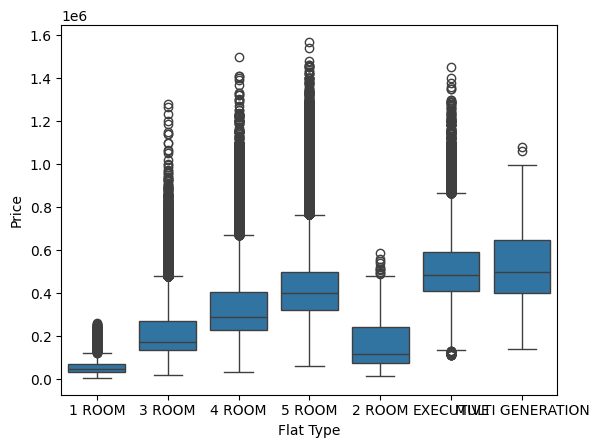

In [17]:
# Visualize relationship between price and flat_type
sns.boxplot(x = df['flat_type'], y = df['resale_price'])
plt.xlabel('Flat Type')
plt.ylabel('Price')
plt.show()

Encoding the flat type categories

In [18]:
# Assigning the value-pairs to be replaced
cat = {'1 ROOM': 1,
       '2 ROOM':2,
       '3 ROOM':3,
       '4 ROOM':4,
       '5 ROOM':5,
       'EXECUTIVE':6,
       'MULTI GENERATION':7}

# Replacing the values in df
df['flat_type'] = df['flat_type'].replace(cat)
df['flat_type'].value_counts()

4    348705
3    293834
5    193456
6     69126
2     11588
1      1300
7       540
Name: flat_type, dtype: int64

Dealing with collapsed flat model categories

#### flat_model column

In [19]:
# Flat_model column
print(df['flat_model'].nunique())
df['flat_model'].unique()

34


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [20]:
# Deal with capitalized value
df['flat_model'] = df['flat_model'].str.lower()

In [21]:
# Number of unique lables in flat model after dealing with capitalized values
df['flat_model'].nunique()

21

In [22]:
# Altered flat_model column
df['flat_model'].value_counts()

model a                   261730
improved                  239771
new generation            187972
simplified                 57247
premium apartment          45928
standard                   42336
apartment                  35210
maisonette                 29455
model a2                   10044
dbss                        3223
model a-maisonette          2065
adjoined flat               1236
terrace                      690
multi generation             540
type s1                      430
type s2                      213
improved-maisonette          125
2-room                       115
premium apartment loft       107
premium maisonette            86
3gen                          26
Name: flat_model, dtype: int64

In [23]:
# Encoding flat_model column
le = preprocessing.LabelEncoder()

flat_modelcode= le.fit_transform(df['flat_model'])
df.insert(loc = 8,
          column = 'flat_modelcode',
          value = flat_modelcode)

In [24]:
df['flat_modelcode'].value_counts()

8     261730
5     239771
12    187972
16     57247
13     45928
17     42336
3      35210
7      29455
10     10044
4       3223
9       2065
2       1236
18       690
11       540
19       430
20       213
6        125
0        115
14       107
15        86
1         26
Name: flat_modelcode, dtype: int64

#### Other features preparation

In [25]:
# Town column 
df['town'].nunique()

27

In [26]:
df['town'].value_counts()

TAMPINES           79342
YISHUN             69494
BEDOK              66241
JURONG WEST        66065
WOODLANDS          64923
ANG MO KIO         51772
HOUGANG            50269
BUKIT BATOK        43843
CHOA CHU KANG      37906
BUKIT MERAH        34030
PASIR RIS          33018
SENGKANG           31878
TOA PAYOH          31308
QUEENSTOWN         28571
GEYLANG            27992
CLEMENTI           27869
BUKIT PANJANG      27442
KALLANG/WHAMPOA    26913
JURONG EAST        24595
SERANGOON          22688
BISHAN             21154
PUNGGOL            20034
SEMBAWANG          13554
MARINE PARADE       8000
CENTRAL AREA        7086
BUKIT TIMAH         2498
LIM CHU KANG          64
Name: town, dtype: int64

In [27]:
# Creating a column with encoded value
town_code = le.fit_transform(df['town'])
df.insert(loc = 2,
          column = 'town_code',
          value = town_code)

In [28]:
# Encoded value count
df['town_code'].value_counts()

23    79342
26    69494
1     66241
13    66065
25    64923
0     51772
11    50269
3     43843
8     37906
4     34030
17    33018
21    31878
24    31308
19    28571
10    27992
9     27869
5     27442
14    26913
12    24595
22    22688
2     21154
18    20034
20    13554
16     8000
7      7086
6      2498
15       64
Name: town_code, dtype: int64

#### Dividing the columns

In [29]:
# Print header of column
df['storey_range'].head()

0    10 TO 12
1    04 TO 06
2    10 TO 12
3    07 TO 09
4    04 TO 06
Name: storey_range, dtype: object

In [30]:
# Splitting storey range column
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()

,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [31]:
# Creating the storey minimum values as column
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])

In [32]:
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [33]:
# Splitting month column
month=df['month'].str.split('-',expand = True)
month.head()

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01


In [34]:
# Creating the year values as column
df.insert(loc = 1,
          column = 'selling_year',
          value = month[0])

In [35]:
# Creating the storey maximum values as column
df.insert(loc = 2,
          column = 'selling_month',
          value = month[1])

In [36]:
df.head()

,month,selling_year,selling_month,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0


In [37]:
import os

directory = 'dataset'

# Check if the directory exists
if not os.path.exists(directory):
    # Create the directory if it doesn't exist
    os.makedirs(directory)

# Now, you can save the file in the 'dataset' directory
df.to_csv(os.path.join(directory, 'Pricedata.csv'), index=False)


In [38]:
df.to_csv('dataset\Pricedata.csv', index=False)

#### Dealing with datatypes

In [39]:
# Datatyppe of the columns
df.dtypes

month                   object
selling_year            object
selling_month           object
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

In [40]:
# Changing the datatype of numeric columns
df[['selling_year','selling_month','storey_min','storey_max']] = df[['selling_year','selling_month','storey_min','storey_max']].astype('int')

In [41]:
df.dtypes

month                   object
selling_year             int32
selling_month            int32
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min               int32
storey_max               int32
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

<Axes: >

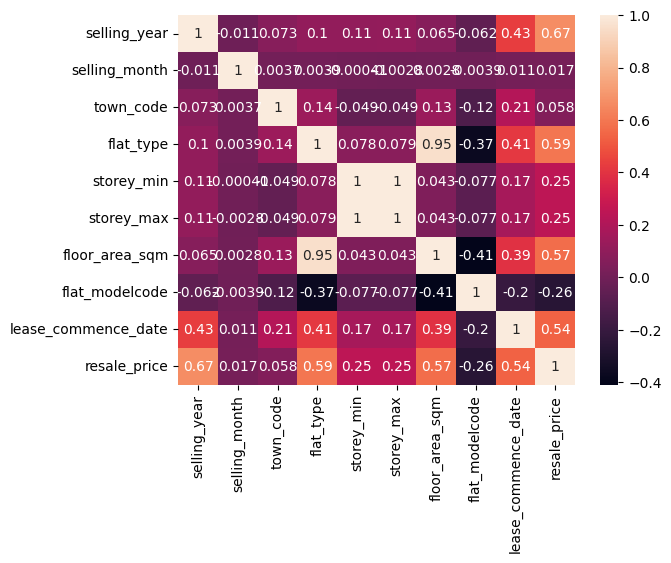

In [42]:
# Correlation for the feature
corr_df = df[['selling_year','selling_month','town_code','flat_type','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date','resale_price']].dropna().corr()
sns.heatmap(corr_df, annot = True)

### Training the model

In [43]:
# Assigning the data
X = df[['selling_year','selling_month','town_code','flat_type','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date']]
y = df['resale_price']

In [44]:
X

,selling_year,selling_month,town_code,flat_type,storey_min,storey_max,floor_area_sqm,flat_modelcode,lease_commence_date
0,1990,1,0,1,10,12,31.0,5,1977
1,1990,1,0,1,4,6,31.0,5,1977
2,1990,1,0,1,10,12,31.0,5,1977
3,1990,1,0,1,7,9,31.0,5,1977
4,1990,1,0,3,4,6,73.0,12,1976
...,...,...,...,...,...,...,...,...,...
918544,2024,2,26,5,4,6,113.0,5,2018
918545,2024,2,26,6,4,6,146.0,7,1988
918546,2024,2,26,6,10,12,142.0,3,1987
918547,2024,2,26,6,7,9,146.0,7,1987


In [45]:
# Splitting the data
# Importing the split
from sklearn.model_selection import train_test_split

# Objecting the split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#### Linear Regression

In [46]:
# Create a regressor
from sklearn.linear_model import LinearRegression

# Create a regressor object
lin_reg = LinearRegression()

# fit the model with X-train and y_train data
lin_reg.fit(X_train,y_train)

LinearRegression()

In [47]:
# Accuracy score of the model
score = lin_reg.score(X_test,y_test)
print(score * 100,"%")

76.06886779979153 %


#### Decision Tree Regressor

In [48]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
Dt_reg = DecisionTreeRegressor(random_state = 0)  
  
# fit the model with X-train and y_train data 
Dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [49]:
# Accuracy of the model
score = Dt_reg.score(X_test,y_test)
print(score * 100,"%")

95.97696641661598 %


#### Random Forest Regressor

In [50]:
# import joblib

# with open("resale_rfr.pkl", "wb") as files:
#     joblib.dump(rf_reg, files)


NameError: name 'rf_reg' is not defined

In [51]:
# Create a regressor
from sklearn.ensemble import RandomForestRegressor

# Create a regressor object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model with X-train and y_train data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [52]:
# Accuracy of the model
score = rf_reg.score(X_test,y_test)
print(score * 100,"%")

97.67060558399525 %


Pickling the random forest trained knowledge to build streamlit ML model web page

In [53]:
# Pickling the trained model
# Importing the pickle package
import pickle

with open("resale_rfr.pkl","wb") as files:
  pickle.dump(rf_reg, files)

In [54]:
with open('resale_rfr.pkl', 'rb') as file:
    loaded_model = pickle.load(file)



In [55]:
sample_data = ([[2019,12,0,1,10,12,115,5,2000]])
prediction = loaded_model.predict(sample_data)

# Display the prediction
print("Prediction:", prediction)

Prediction: [663526.26]


In [56]:
sample_data1 = ([[2019,1,1,2,10,12,'115.0',2,2000]])
predict = rf_reg.predict(sample_data1)

# Display the prediction
print("Prediction:", predict)

Prediction: [617310.]


In [57]:
sample_data1 = ([[2024,1,26,6,4,6,146.0,5,1988]])
dtpredict = Dt_reg.predict(sample_data1)

# Display the prediction
print("Prediction:", dtpredict)

Prediction: [795000.]
